<img src="visualisations/LOGO-UPEM-UFRSHS.png" align="left">

<h1 align="right">Adil OUAFSSOU</h1>

<h1 align="right">Master 2 Etudes numériques et innovation</h1>

#               Analyse comparée des différentes méthodes de sentiment analysis

### Thématique traitée :  

Etude des modes d'expression concernant le thème du suicide 

### Objet :  




Le forum Reddit

### Problématique :



On souhaite ici mesurer la pertinance ('l'accuracy') des différentes méthodes 
d'analyse des sentiments avec R, afin de voir si l'une se démarque plus que les autres.

La thématique du suicide via l'objet Reddit demeure ici particulièrement pertinante dans la mesure où, après
avoir réalisé une premiere approche exploratoire du forum, on remarque que différents modes d'expressions voient le jour quand à ce sujet au travers de plusieurs espaces distincts (qui correspondent ici à des subreddits)

### Méthodologie :

Nous avons scrapé 4 subreddits qui traitent de manière exhaustive de cette problématique du suicide 
(via l'API de Reddit) mais sous différents aspects.

Voici une brève présentation des ces sous-forums :

- Le subreddit SuicideWatch est un espace qui effectue de la veille dans l'objectif d'aider les personnes qui
  seraient plongées dans une profonde détresse.
  Un panel de ressources est aussi mis à disposition pour les internautes afin de les aider à trouver 
  une oreille attentive ainsi que d'autres personnes qui pourraient être à leur écoute de manière plus    personnalisée
  
 
- Le subreddit Suicidology qui lui est un espace beaucoup plus subversif dans la mesure où il essaye de comprendre ce sujet du suicide (en étudiant les différentes types de procédés relatifs à la réalisation d'un suicide) via une approche scientifique, afin d'appuyer la prévention à cet effet.


- Le subreddit reasonstolive se démarque des autres subreddits ici, puisqu'il adopte une logique qui est hautement polarisé vers des notes positives qui sont appuyées afin de convaincre les individus à poursuivre leurs existences en rompant avec leurs diverses intentions suicidaires.


- Le subreddit SuicideBereavement réunit plutôt des individus qui s'expriment au sujet de la perte d'un proche qui aurait commis un suicide.

In [202]:
# On importe les données
sub1 = read.csv("data_subreddits/subreddit_SuicideWatch_comments_full.csv", header = TRUE, stringsAsFactors = FALSE)
sub2 = read.csv("data_subreddits/subreddit_suicidology_comments_full.csv", header = TRUE, stringsAsFactors = FALSE)
sub3 = read.csv("data_subreddits/subreddit_reasonstolive_comments_full.csv", header = TRUE, stringsAsFactors = FALSE)
sub4 = read.csv("data_subreddits/subreddit_SuicideBereavement_comments_full.csv", header = TRUE, stringsAsFactors = FALSE)
# sub1

## Vue d'ensemble des subreddits 

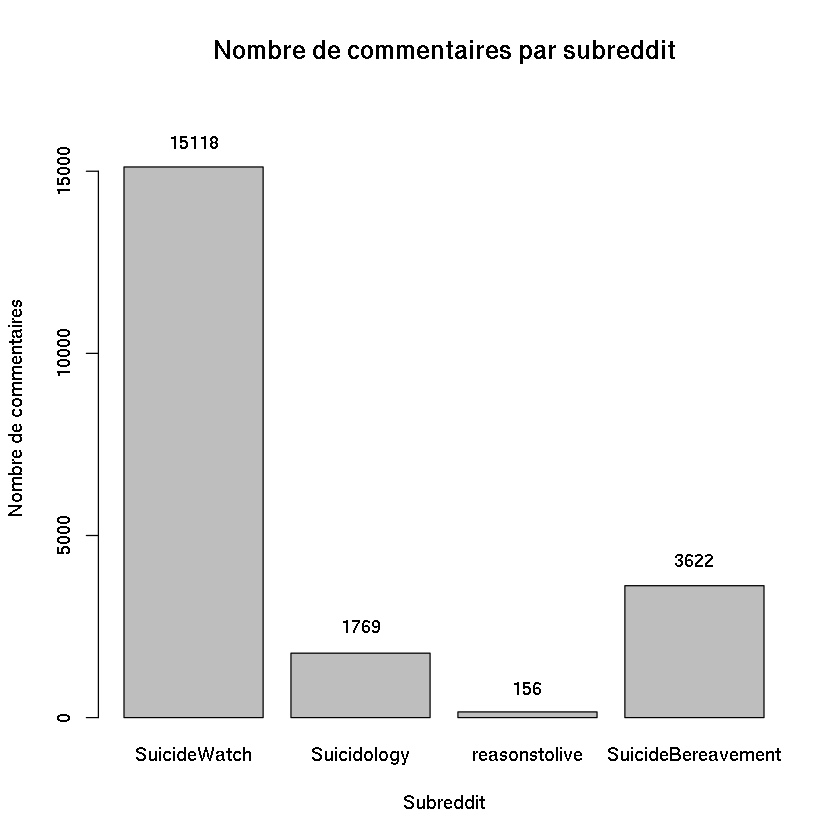

In [3]:
# On définit les effectifs des commentaires pour chaque subreddit
c1 = length(sub1$body)
c2 = length(sub2$body)
c3 = length(sub3$body)
c4 = length(sub4$body)

my_vector=c(c1,c2,c3,c4)
# On ajoute les labels pour chaque subreddit 
names(my_vector)=c("SuicideWatch","Suicidology","reasonstolive","SuicideBereavement")

# On réalise une visualisation de type "bar chart"
barplot(my_vector, main="Nombre de commentaires par subreddit",
        xlab="Subreddit", ylab="Nombre de commentaires", ylim=c(0,17000))

# On affiche le nombre de commentaires au sein de la visualisation
text(0.7, 15800, c1)
text(1.9, 2500, c2)
text(3.1, 800, c3)
text(4.3, 4300, c4)

## Analyse comparative des différentes méthodes d'analyses des sentiments :

In [99]:
# On importe ici les librairies que nous utiliserons pour ce projet
library(dplyr)
library(tidyverse)
library(tidytext)
library(glue)
library(stringr)
library(widyr)
library(radarchart)

In [98]:
# tidytext::get_sentiments("afinn")
# tidytext::get_sentiments("bing")
# tidytext::get_sentiments("nrc")

# glimpse(sub1) affiche les variables de notre dataframe sub1

### I - Comparaison des différents lexicon (AFINN, bing, nrc) :

#### En terme de volume des lexiques :

In [10]:
# Wordcount par lexicon (premier comparatif au niveau des lexiques des méthodes)

new_sentiments <- sentiments %>% 
  filter(lexicon != "loughran") %>% # On supprime le lexique financier
  mutate( sentiment = ifelse(lexicon == "AFINN" & score >= 0, "positive",
                              ifelse(lexicon == "AFINN" & score < 0,
                                     "negative", sentiment))) %>%
  group_by(lexicon) %>%
  mutate(words_in_lexicon = n_distinct(word)) %>%
  ungroup()

new_sentiments %>%
  group_by(lexicon, sentiment, words_in_lexicon) %>%
  summarise(distinct_words = n_distinct(word)) %>%
  ungroup() %>%
  spread(sentiment, distinct_words)


lexicon,words_in_lexicon,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
AFINN,2476,NA,NA,NA,NA,NA,1597,879,NA,NA,NA
bing,6785,NA,NA,NA,NA,NA,4782,2006,NA,NA,NA
nrc,6468,1247,839,1058,1476,689,3324,2312,1191,534,1231


##### Première critique :
On remarque ici que les lexicon ne sont pas uniformes en terme de taille (mots contenus dans un lexique)


- En effet la méthode AFINN présente le moins de mots contenus dans son lexique 

On pourrait alors penser que cette disparité est évidente compte tenu du fait que la méthode nrc intègre de nombreuses autres variables qui se calquent sur un système d'émotions (colère, peur, joie, tristesse....).

Cependant on voit ici que la méthode bing (qui est une méthode qui fonctione par polarité "négative / positive") a un lexique un peu plus grand que celui du nrc.

Par ailleurs la méthode AFINN sépare sa polarité par scoring (allant de -5 pour le plus négatif à +5 pour le plus positif), donc cet éventail de possibilités est assez similaire à celui de la méthode nrc (qui elle aussi présente 10 possibilités différentes mais sous la forme d'émotions).

##### Deuxième critique : 

On peut aussi observer un certains déséquilibre concerant la distribution de la polarisation "négative / positive".

En effet comme le montre la description statistique suivante, la proportion de mots négatifs varie de manière plus ou moins significative d'un lexique à un autre (à noter ici que les mots négatifs sont en tendance globale plus nombreux que les mots positifs et ce quelque soit le lexique identifié)

- La méthode Bing comporte 70 % de mots polarisé comme étant négatifs, on évitera donc d'utiliser celle-ci car le biais sera relativement conséquent (mais elle peut démeurer particulièrement pertinente pour les thématiques qui ne s'intéresse qu'à un seul type de polarité. 

 Au vu de notre thématique cette piste peut être intéressante, c'est pourquoi nous l'étudierons brièvement en  fin d'analyse).


- La méthode nrc quand à elle, dispose d'un taux plus normalisé puisqu'il se situe autour des 59%. Elle semble donc être la plus équilibrée en terme de polarité (puisqu'elle est celle qui se rapproche le plus d'une situation d'équiprobabilité), et présente l'avantage d'approximer des sentiments, ce qui peut faciliter l'intérprétabilité des résultats obtenus (toujours au regard de notre thématique cette méthode est particulièrement pertinente pour établir un focus qualitatif, afin de voir quels "sentiments" sont les plus dominants au sein des différents subreddits).


In [42]:
p_nrc = (3324 / 5636) * 100
p_bing = (4782 / 6788) * 100
p_afinn = (1597 / 2476) * 100

message("Méthode AFINN : ", p_afinn)

message("Méthode bing : ", p_bing)

message("Méthode nrc : ", p_nrc)

Méthode AFINN : 64.4991922455574
Méthode bing : 70.447849145551
Méthode nrc : 58.9779985805536


#### Exemple illustratif appliqué à une liste de mots génériques (suicide, alone, pain, discouraged) :

In [48]:
new_sentiments %>%
  filter(word %in% c("suicide", "alone", "pain",
                     "discouraged")) %>%
  arrange(word) %>% 
  select(-score)

word,sentiment,lexicon,words_in_lexicon
alone,negative,AFINN,2476
discouraged,negative,AFINN,2476
pain,fear,nrc,6468
pain,negative,nrc,6468
pain,sadness,nrc,6468
pain,negative,bing,6785
pain,negative,AFINN,2476
suicide,anger,nrc,6468
suicide,fear,nrc,6468
suicide,negative,nrc,6468


##### Troisième critique :

On voit très clairement ici les limites propres aux différents lexiques, puisque certains mots ne sont répertoriés que pour des lexiques particuliers (et sont par conséquent totalement absent pour d'autres).

Dans notre cas les mots "alone" et "discouraged" ne sont identifiés que par le lexique de la méthode AFINN, alors que d'autres mots tels que "pain", ou "suicide" sont a contrario bien identifiés par les trois différents lexicons des méthodes AFINN, bing et nrc.

On doit donc être très prudent lorsqu'on souhaite réaliser une analyse de sentiments ici puisqu'on est ici confronté au dilemne suivant :

- Si l'on souhaite gagner en précision, il faudrait ici se limiter à la méthode AFINN qui semble plus exhaustive (bien qu'elle soit paradoxalement la plus réduite en terme de volume de mots répertoriés)

- Cependant comme on a pu le voir précédement, la méthode nrc peut nous permettre d'apporter plus de nuances qualitativement à travers l'appui de ce gradient d'émotions.


On cumulera alors ici l'usage de ces deux méthodes afin de confronter les deux versants de notre dilemne entre précision et interprétabilité. 

**N.B :** 

A noter que nous sélectionnons ici que deux des subreddits qui sont ici étudiés par effort de synthèse.
En effet réaliser une analyse exhaustive risquerait de dépasser le cadre de ce rendu (mais pourrait alimenter le travail d'un mémoire de recherche par exemple).

On choisira donc ici les subreddits suivants : sucidology & reasonstolive

Ces deux subreddits se positionnent en tant que soutients qui orientent leurs actions vers le fait de dissuader les individus à commettre un acte de suicide.

Et chacun de ces espaces utilise un mode d'expression particulier.

Il nous semble alors pertinent d'observer ces différents modes d'expressions au travers de l'analyse des sentiments, afin de voir si cette approche peut demeurer significativement pertinente pour appréhender ce type d'objet d'étude.



### 1 - Application de la méthode nrc aux 4 subreddits  :

## SuicideWatch : 

Joining, by = "word"
Joining, by = "word"


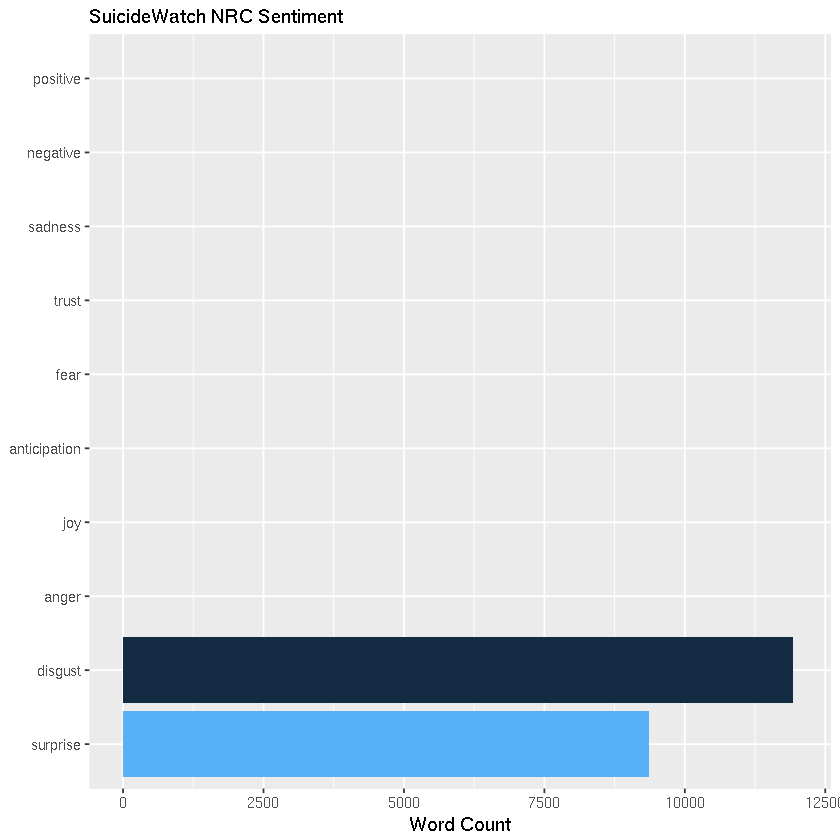

In [193]:
list_nb = seq(10000)
sub1_tidy <- sub1 %>%
  unnest_tokens(word, body) %>%
  filter(!word %in% list_nb) %>%
  anti_join(stop_words)

sub1_nrc <- sub1_tidy %>%
  inner_join(get_sentiments("nrc"))

nrc_plot1 <- sub1_nrc %>%
  group_by(sentiment) %>%
  summarise(word_count = n()) %>%
  ungroup() %>%
  mutate(sentiment = reorder(sentiment, word_count)) %>%
  ggplot(aes(sentiment, word_count, fill = -word_count)) +
  geom_col() +
  guides(fill = FALSE) + 
  labs(x = NULL, y = "Word Count") +
  scale_y_continuous(limits = c(0, 12000)) + 
  ggtitle("SuicideWatch NRC Sentiment") +
  coord_flip()

print(nrc_plot1)
options(warn=-1)


## Suicidology :

Joining, by = "word"
Joining, by = "word"


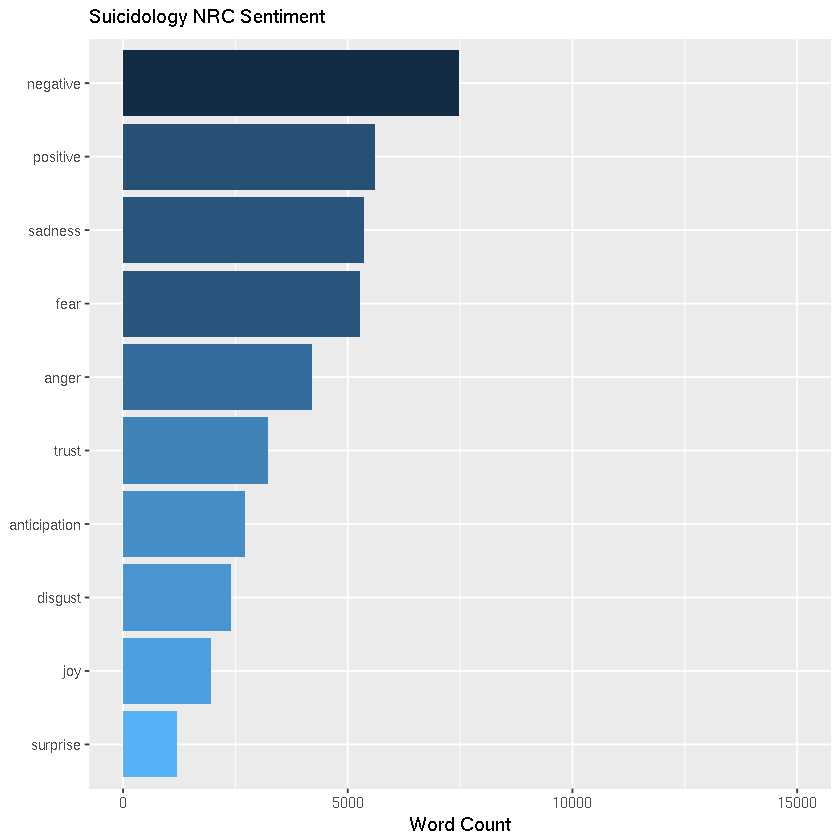

In [194]:
list_nb = seq(10000)
sub2_tidy <- sub2 %>%
  unnest_tokens(word, body) %>%
  filter(!word %in% list_nb) %>%
  anti_join(stop_words) 

sub2_nrc <- sub2_tidy %>%
  inner_join(get_sentiments("nrc"))

nrc_plot2 <- sub2_nrc %>%
  group_by(sentiment) %>%
  summarise(word_count = n()) %>%
  ungroup() %>%
  mutate(sentiment = reorder(sentiment, word_count)) %>%
  ggplot(aes(sentiment, word_count, fill = -word_count)) +
  geom_col() +
  guides(fill = FALSE) + 
  labs(x = NULL, y = "Word Count") +
  scale_y_continuous(limits = c(0, 15000)) + 
  ggtitle("Suicidology NRC Sentiment") +
  coord_flip()

print(nrc_plot2)

## reasonstolive :

Joining, by = "word"
Joining, by = "word"


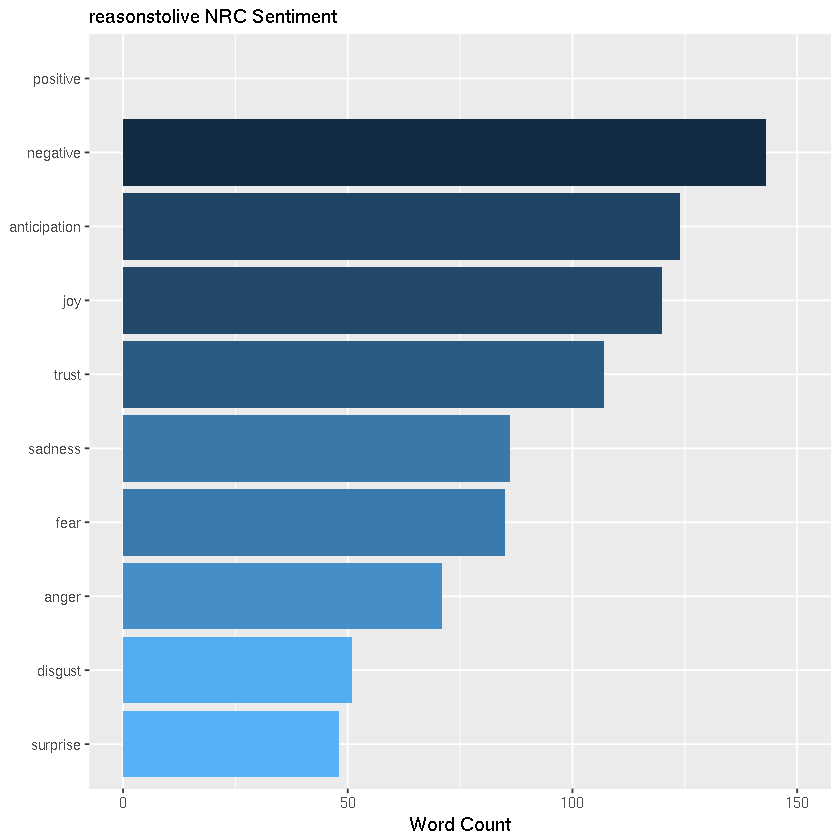

In [195]:
list_nb = seq(10000)
sub3_tidy <- sub3 %>%
  unnest_tokens(word, body) %>%
  filter(!word %in% list_nb) %>%
  anti_join(stop_words) 

sub3_nrc <- sub3_tidy %>%
  inner_join(get_sentiments("nrc"))

nrc_plot3 <- sub3_nrc %>%
  group_by(sentiment) %>%
  summarise(word_count = n()) %>%
  ungroup() %>%
  mutate(sentiment = reorder(sentiment, word_count)) %>%
  ggplot(aes(sentiment, word_count, fill = -word_count)) +
  geom_col() +
  guides(fill = FALSE) + 
  labs(x = NULL, y = "Word Count") +
  scale_y_continuous(limits = c(0, 150)) + 
  ggtitle("reasonstolive NRC Sentiment") +
  coord_flip()

print(nrc_plot3)
options(warn=-1)

## SuicideBereavement : 

Joining, by = "word"
Joining, by = "word"


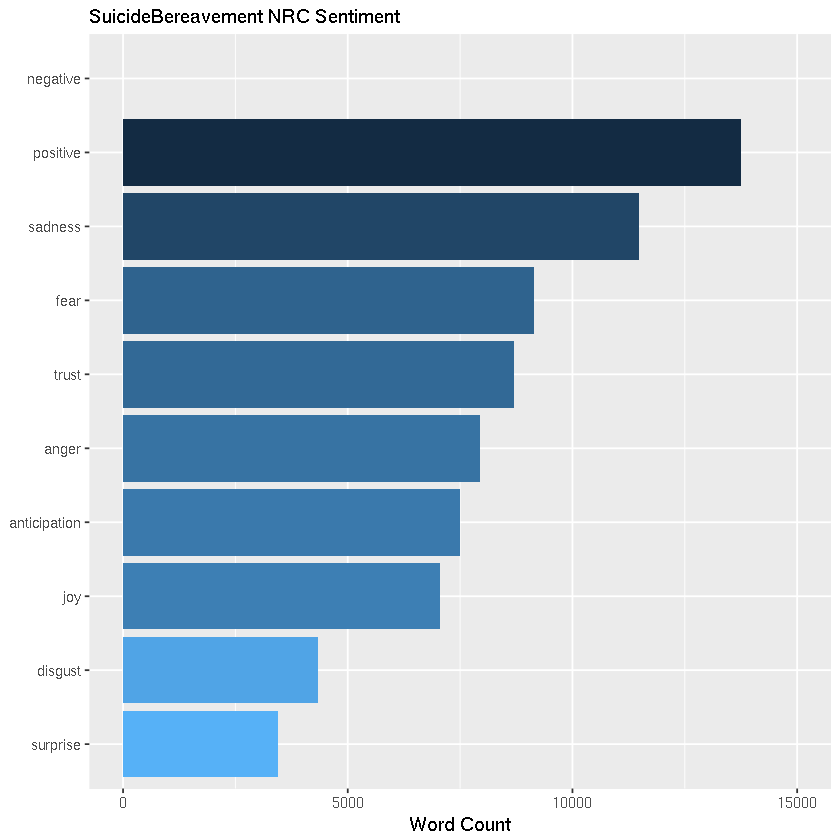

In [196]:
list_nb = seq(10000)
sub4_tidy <- sub4 %>%
  unnest_tokens(word, body) %>%
  filter(!word %in% list_nb) %>%
  anti_join(stop_words) 

sub4_nrc <- sub4_tidy %>%
  inner_join(get_sentiments("nrc"))

nrc_plot4 <- sub4_nrc %>%
  group_by(sentiment) %>%
  summarise(word_count = n()) %>%
  ungroup() %>%
  mutate(sentiment = reorder(sentiment, word_count)) %>%
  ggplot(aes(sentiment, word_count, fill = -word_count)) +
  geom_col() +
  guides(fill = FALSE) + 
  labs(x = NULL, y = "Word Count") +
  scale_y_continuous(limits = c(0, 15000)) + 
  ggtitle("SuicideBereavement NRC Sentiment") +
  coord_flip()

print(nrc_plot4)
options(warn=-1)

## Bilan 1 : 

D'un point de vue qualitatif, on peut à travers l'utilisation de la méthode nrc, approximer des tendances relatives aux modes d'expression investissent ces différents subreddits :


 - **Suicidology :** la distribution des émotions a une polarité à dominante négative. 
 
 Il serait pertinent de creuser cette piste, afin de voir dans quelles mesures et sous quels aspect les individus s'expriment de manière "négative" sur ce sous-forum. 
 
 En effet une autre hypothèse serait de dire, qu'au vu de l'apparente neutralité de cet espace, la thématique du suicide étant intrinsèquement polarisée de manière négative, il est fort probable que cet espace soit ecrasé par cet effet de structure.
 
 Qui plus est la tristesse et la peur sont particulièrement dominantes au sein de ce subreddit. En couplant ces observations avec la littérature, on peut supposer que ces deux émotions sont classiquement évoquées et correlé à cette thématique du suicide.
 
 
 
 
 
 
 - **reasonstolive :** la distribution des émotions est ici à dominante à la fois négative et "d'anticipation".
 
 On peut donc émettre l'hypothèse ici que les modes d'expressions ici caractérisent des individus qui seraient dans un état latent, qui se traduit par la manifestation de leur indécision.
 
 Cependant à la suite de cette première interprétation on retrouve les émotions de la joie et de la confiance qui sont elles aussi dominantes. 
 
 Cette seconde interprétation pour caractériser les discours réalisés par d'autres individus qui tenteraient de dissuader ceux qui seraient paralysés par leurs propres pensées suicidaires, de passer à l'acte.
 
 
 
 
 
 
 - **SuicideBereavement :** la distribution des émotions est cette fois-ci à dominante positive !
 Néanmoins, on retrouve un cluster conséquent qui regroupe les émotions de tristesse, peur, confiance/hope, et colère. 
 
 Par opposition au subreddit précédent, on a ici un espace qui est submergé par des modes d'expressions positifs, mais est aussi associé à des émotions qui rappelent la thématique du deuil. 
 
 Autrement dit, les individus essayent de se positionner ici en tant que soutients afin d'aider les personnes qui ont perdu des proches par le suicide. (on retrouve en effet les étapes du deuil qui ont été dressées par la psychiatre Elisabeth Kübler-Ross).
 
 
 
 
 
 
 - **SuicideWatch :** le cas de ce subreddit est plus complexe puisqu'il ne dessine que deux dynamiques majeures qui correspondent au dégoût et à la stupeur. 
 
 On pourrait donc émettre l'hypothèse ici que cet espace se structure comme une agora, où chacun laisse libre court à ses émotions. 
 
 Cependant le résultat reste néanmoins quelque peu étrange compte tenu du fait que les autres émotions semblent quasi inexistantes. 
 
 Il est possible que le lexique ne les reconnait pas, ou qu'elles soient submergées par les effectifs du dégoût et de la stupeur. 
 
 Quoiqu'il en soit nous établirons un focus plus accentué sur ce subreddit (en gardant en mémoire cette aporie abérante).  
 
 
 
 
 
 
 
 
**N.B :**

Afin de gagner en interprétabilité, les nuages de mots qui sont réalisés par la suite consitituent une solution pratique que je vous invite à regarder conjointement.

### 2 - Radar pour visualiser l'ensemble des sentiments pour tous les subreddits :

In [154]:
sub1$df = c("SuicideWatch")
sub2$df = c("Suicidology")
sub3$df = c("reasonstolive")
sub4$df = c("SuicideBereavement")
sub_all = rbind(sub1, sub2, sub3, sub4)


list_nb = seq(10000)
sub_all_tidy <- sub_all %>%
  unnest_tokens(word, body) %>%
  filter(!word %in% list_nb) %>%
  anti_join(stop_words) 

sub_all_nrc <- sub_all_tidy %>%
  inner_join(get_sentiments("nrc"))

Joining, by = "word"
Joining, by = "word"


In [ ]:
#Get the count of words per sentiment per subreddit
sub_sentiment_nrc <- sub_all_nrc %>%
  group_by(df, sentiment) %>%
  count(df, sentiment) %>%
  select(df, sentiment, sentiment_df_count = n)

#Get the total count of sentiment words per subreddit
total_sentiment_df <- sub_all_nrc %>%
  count(df) %>%
  select(df, df_total = n)

#Join the two and create a percent field
df_radar_chart <- sub_sentiment_nrc %>%
  inner_join(total_sentiment_df, by = "df") %>%
  mutate(percent = sentiment_df_count / df_total * 100 ) %>%
  filter(df %in% c("SuicideWatch","Suicidology","reasonstolive", "SuicideBereavement")) %>%
  select(-sentiment_df_count, -df_total) %>%
  spread(df, percent) %>%
  chartJSRadar(showToolTipLabel = TRUE,
               main = "NRC Years Radar")

Radar dynamique qui se base sur l'ensemble des 4 subreddits et utilise la méthode nrc

In [203]:
# Jupyter ne voulait pas afficher le fichier, j'ai du ajouter cet extrait de code
# Vous pouvez modifier l'HTML pour changer la taille ou l'orientation du fichier comme il vous sied
# (width, height etc...)
IRdisplay::display_html('<iframe src="visualisations/radar_all_subreddits.html" align="center" width="950" height="550" frameBorder="0"></iframe>')

### 2 bis - Worldclouds pour visualiser l'ensemble des sentiments pour tous les subreddits :

**Ici chaque cluster de couleur correspond à une émotion. On a donc le schéma suivant :**

- <font color="olive">Disgust (dégoût)</font> est de couleur <font color="olive">olive</font>.
- <font color="purple">Fear (peur)</font> est de couleur <font color="purple">violette</font>
- <font color="orange">Joy (la joie)</font> est de couleur <font color="orange">orange</font>


- <font color="red">Les termes négatifs</font> sont en <font color="red">rouge</font>
- <font color="gold">Les termes positifs</font> sont en <font color="gold">jaune / doré</font>


- <font color="darkblue">Sadness (la tristesse)</font> est de couleur <font color="darkblue">bleu foncé</font>
- <font color="turquoise">Surprise (la surprise)</font> est de couleur <font color="turquoise">turquoise</font>
- <font color="green">Trust (la confiance)</font> est de <font color="green">couleur verte</font>
- <font color="black">Anger (la colère)</font> est de <font color="black">couleur noire</font>
- <font color="grey">Anticipation ()</font>  est de <font color="grey">couleur grise</font>


**Wordcloud 1 Subreddit SuicideWatch :**

Joining, by = "word"


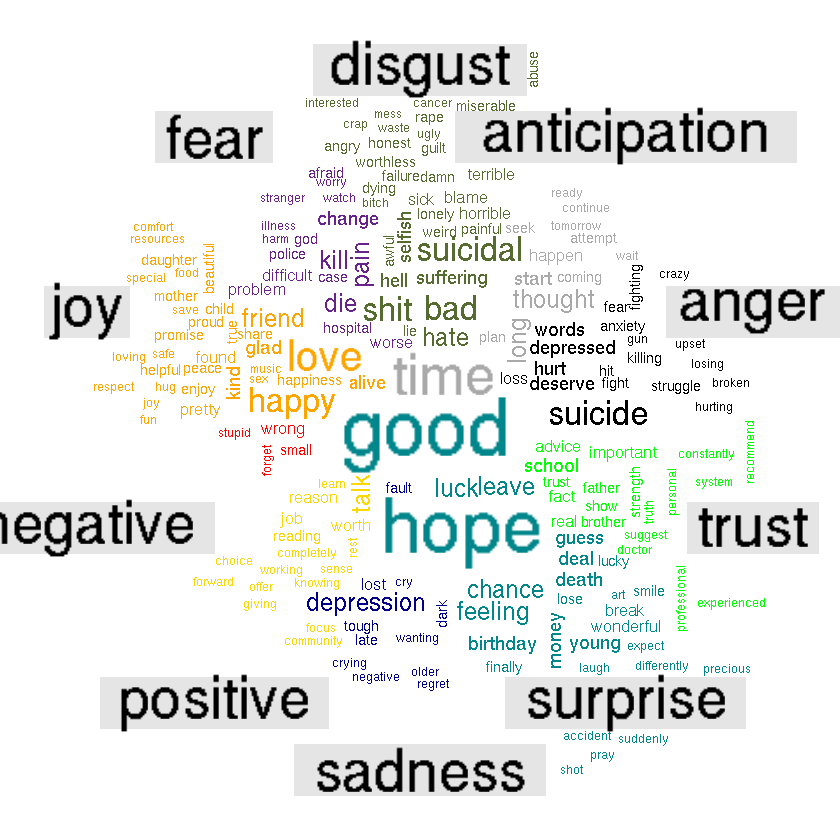

In [197]:
library(wordcloud)
library(reshape2)
sub1%>%
tidytext::unnest_tokens(word,body)%>%
inner_join(get_sentiments("nrc")) %>%
count(word, sentiment, sort = TRUE) %>%
reshape2::acast(word ~ sentiment, value.var = "n", fill = 0) %>%
comparison.cloud(colors = c("black", "darkgrey", "darkolivegreen", "darkorchid4", "orange", "red", "gold",
                           "darkblue", "turquoise4", "green"),

max.words = 200)
options(warn=-1)

**Wordcloud 2 Subreddit Suicidology :**

Joining, by = "word"


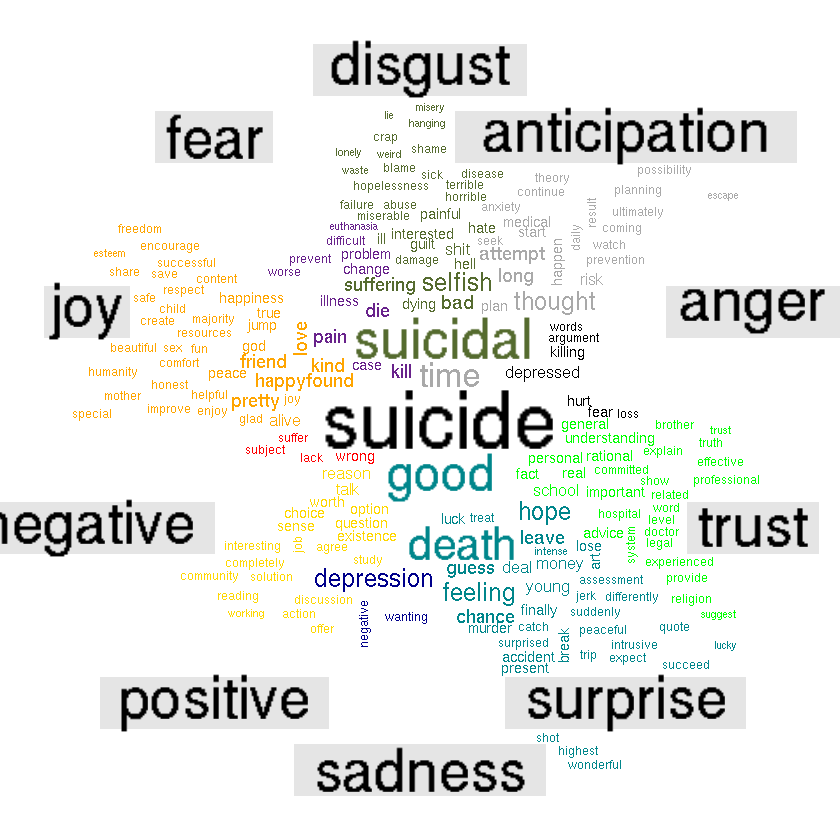

In [182]:
library(wordcloud)
library(reshape2)
sub2%>%
tidytext::unnest_tokens(word,body)%>%
inner_join(get_sentiments("nrc")) %>%
count(word, sentiment, sort = TRUE) %>%
reshape2::acast(word ~ sentiment, value.var = "n", fill = 0) %>%
comparison.cloud(colors = c("black", "darkgrey", "darkolivegreen", "darkorchid4", "orange", "red", "gold",
                           "darkblue", "turquoise4", "green"),

max.words = 200)
# Ne pas afficher les message "warning"
options(warn=-1)

**Wordcloud 3 Subreddit reasonstolive :**

Joining, by = "word"


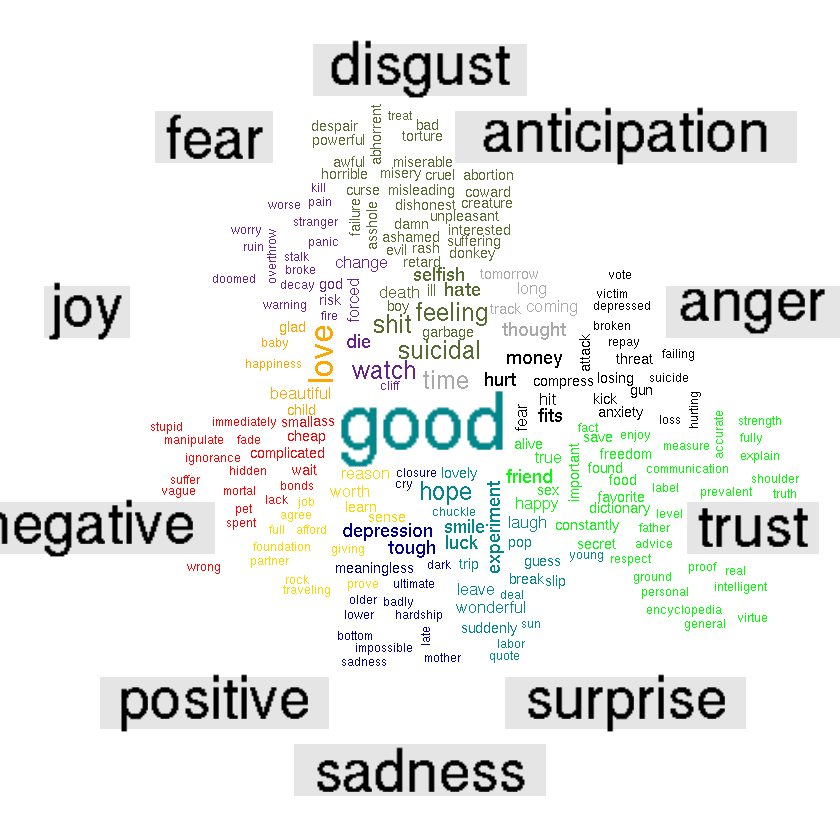

In [183]:
library(wordcloud)
library(reshape2)
sub3%>%
tidytext::unnest_tokens(word,body)%>%
inner_join(get_sentiments("nrc")) %>%
count(word, sentiment, sort = TRUE) %>%
reshape2::acast(word ~ sentiment, value.var = "n", fill = 0) %>%
comparison.cloud(colors = c("black", "darkgrey", "darkolivegreen", "darkorchid4", "orange", "red", "gold",
                           "darkblue", "turquoise4", "green"),

max.words = 200)
options(warn=-1)

**Wordcloud 3 Subreddit reasonstolive :**

Joining, by = "word"


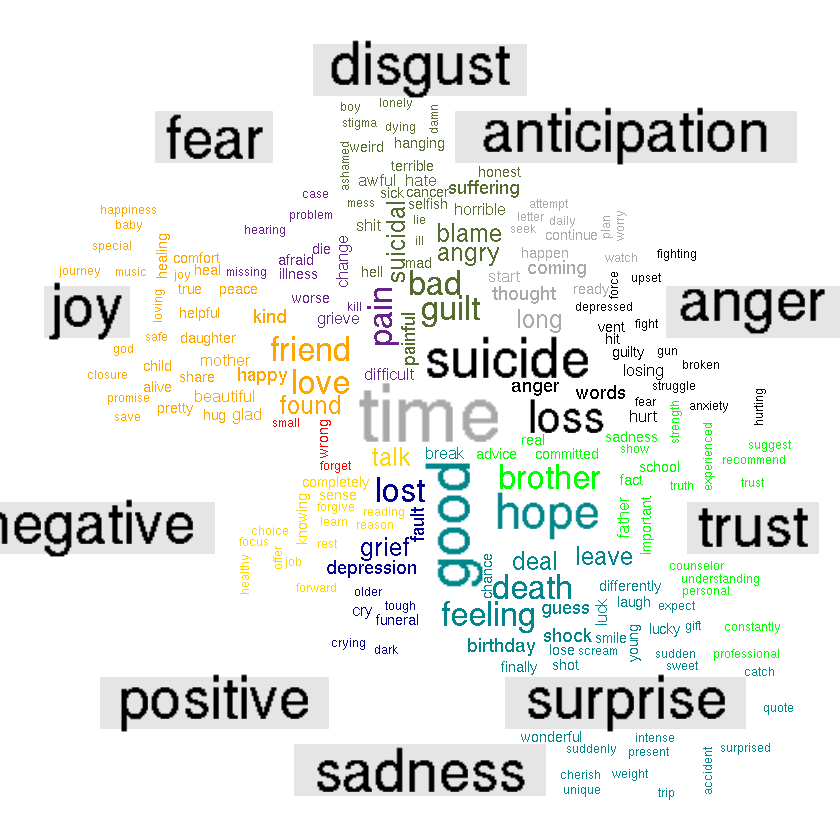

In [184]:
library(wordcloud)
library(reshape2)
sub4%>%
tidytext::unnest_tokens(word,body)%>%
inner_join(get_sentiments("nrc")) %>%
count(word, sentiment, sort = TRUE) %>%
reshape2::acast(word ~ sentiment, value.var = "n", fill = 0) %>%
comparison.cloud(colors = c("black", "darkgrey", "darkolivegreen", "darkorchid4", "orange", "red", "gold",
                           "darkblue", "turquoise4", "green"),

max.words = 200)
options(warn=-1)

### 3 - Représentation des modes d'expression des 4 subreddits par bigrammes via la méthode afinn :

#### Graphique 1 des bigrammes des commentaires du subreddit SuicideWatch :

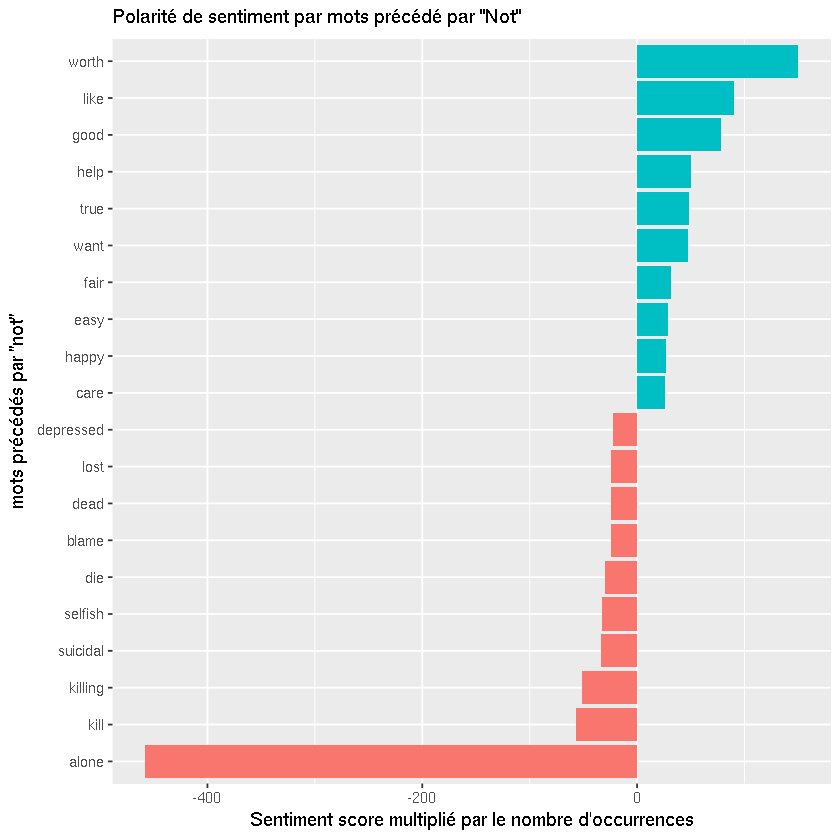

In [152]:
sub1_bigrams <- sub1 %>%
  unnest_tokens(bigram, body, token = "ngrams", n = 2)

bigrams_separated <- sub1_bigrams %>%
  separate(bigram, c("word1", "word2"), sep = " ")

AFINN <- get_sentiments("afinn")

not_words <- bigrams_separated %>%
  filter(word1 == "not") %>%
  inner_join(AFINN, by = c(word2 = "word")) %>%
  count(word2, score, sort = TRUE) %>%
  ungroup()

not_words %>%
  mutate(contribution = n * score) %>%
  arrange(desc(abs(contribution))) %>%
  head(20) %>%
  mutate(word2 = reorder(word2, contribution)) %>%
  ggplot(aes(word2, n * score, fill = n * score > 0)) +
  geom_col(show.legend = FALSE) +
  xlab("mots précédés par \"not\"") +
  ylab("Sentiment score multiplié par le nombre d'occurrences") +
  ggtitle("Polarité de sentiment par mots précédés par \"Not\"") +
  coord_flip()

#### Graphique 2 des bigrammes des commentaires du subreddit Suicidology :

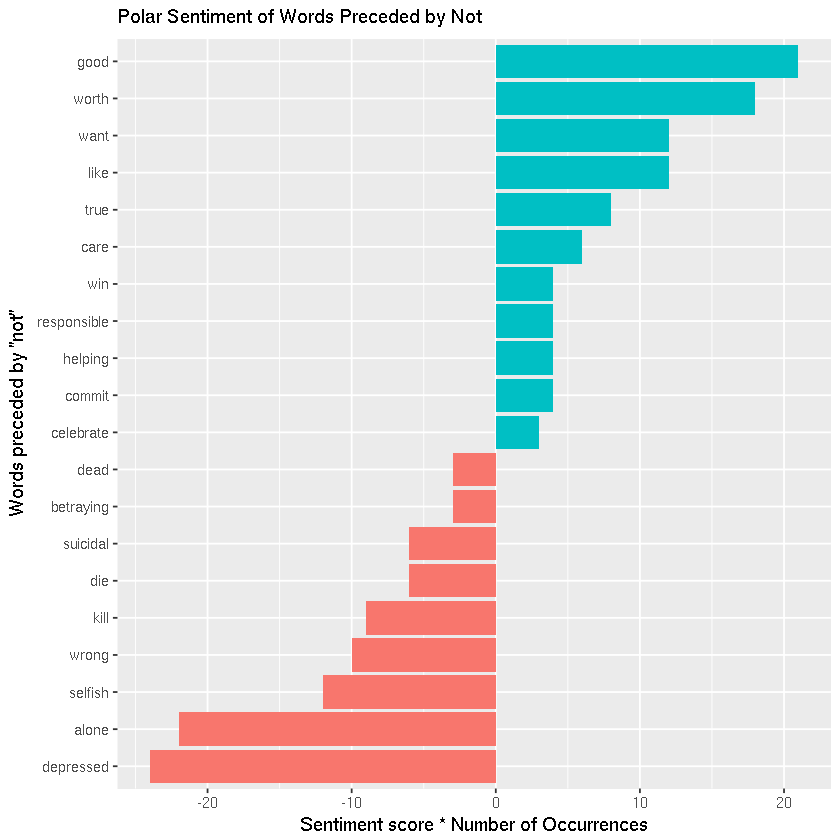

In [82]:
sub2_bigrams <- sub2 %>%
  unnest_tokens(bigram, body, token = "ngrams", n = 2)

bigrams_separated <- sub2_bigrams %>%
  separate(bigram, c("word1", "word2"), sep = " ")


AFINN <- get_sentiments("afinn")

not_words <- bigrams_separated %>%
  filter(word1 == "not") %>%
  inner_join(AFINN, by = c(word2 = "word")) %>%
  count(word2, score, sort = TRUE) %>%
  ungroup()

not_words %>%
  mutate(contribution = n * score) %>%
  arrange(desc(abs(contribution))) %>%
  head(20) %>%
  mutate(word2 = reorder(word2, contribution)) %>%
  ggplot(aes(word2, n * score, fill = n * score > 0)) +
  geom_col(show.legend = FALSE) +
  xlab("mots précédés par \"not\"") +
  ylab("Sentiment score multiplié par le nombre d'occurrences") +
  ggtitle("Polarité de sentiment par mots précédés par \"Not\"") +
  coord_flip()

#### Graphique 3 des bigrammes des commentaires du subreddit reasonstolive :

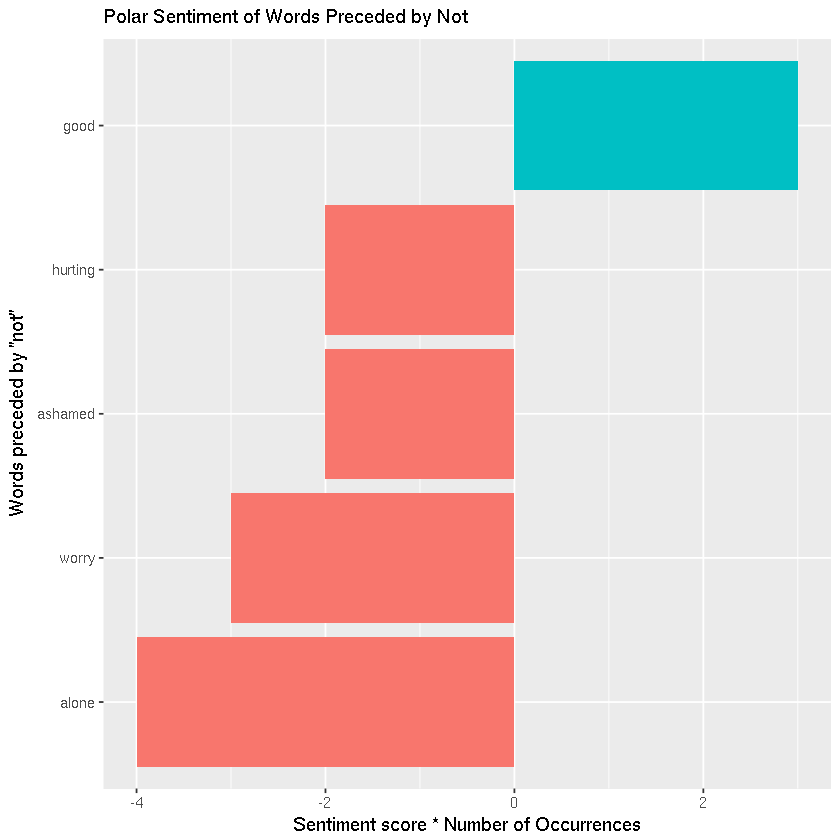

In [83]:
sub3_bigrams <- sub3 %>%
  unnest_tokens(bigram, body, token = "ngrams", n = 2)

bigrams_separated <- sub3_bigrams %>%
  separate(bigram, c("word1", "word2"), sep = " ")

AFINN <- get_sentiments("afinn")

not_words <- bigrams_separated %>%
  filter(word1 == "not") %>%
  inner_join(AFINN, by = c(word2 = "word")) %>%
  count(word2, score, sort = TRUE) %>%
  ungroup()

not_words %>%
  mutate(contribution = n * score) %>%
  arrange(desc(abs(contribution))) %>%
  head(20) %>%
  mutate(word2 = reorder(word2, contribution)) %>%
  ggplot(aes(word2, n * score, fill = n * score > 0)) +
  geom_col(show.legend = FALSE) +
  xlab("mots précédés par \"not\"") +
  ylab("Sentiment score multiplié par le nombre d'occurrences") +
  ggtitle("Polarité de sentiment par mots précédés par \"Not\"") +
  coord_flip()

#### Graphique 4 des bigrammes des commentaires du subreddit SuicideBereavement :

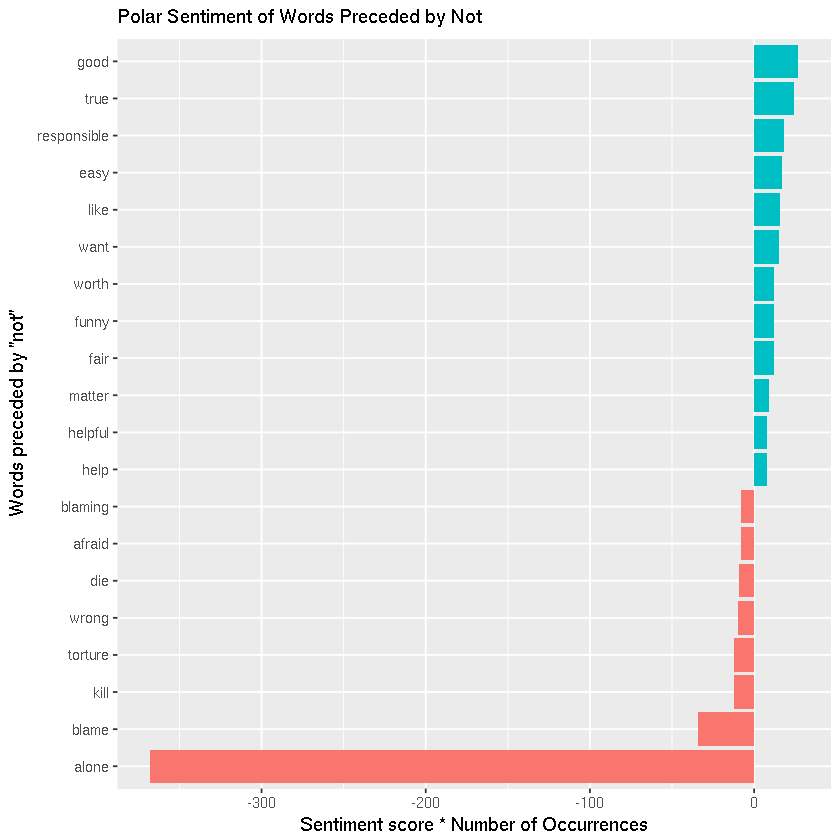

In [84]:
sub4_bigrams <- sub4 %>%
  unnest_tokens(bigram, body, token = "ngrams", n = 2)

bigrams_separated <- sub4_bigrams %>%
  separate(bigram, c("word1", "word2"), sep = " ")

AFINN <- get_sentiments("afinn")

not_words <- bigrams_separated %>%
  filter(word1 == "not") %>%
  inner_join(AFINN, by = c(word2 = "word")) %>%
  count(word2, score, sort = TRUE) %>%
  ungroup()

not_words %>%
  mutate(contribution = n * score) %>%
  arrange(desc(abs(contribution))) %>%
  head(20) %>%
  mutate(word2 = reorder(word2, contribution)) %>%
  ggplot(aes(word2, n * score, fill = n * score > 0)) +
  geom_col(show.legend = FALSE) +
  xlab("mots précédés par \"not\"") +
  ylab("Sentiment score multiplié par le nombre d'occurrences") +
  ggtitle("Polarité de sentiment par mots précédés par \"Not\"") +
  coord_flip()

## Bilan 2 :

On a choisi ici d'utiliser la méthode afinn via une segmentation des mots par bigrammes. Afin d'apporter un peu plus de corps à notre analyse, on a ajouté le préfixe privatif "Not" qui permet de mesurer les modes d'expressions utilisés par l'usage de la négation.

Pour faciliter l'interprétabilité des graphiques ici réalisés, la partie en bleu qualifie les mots à polarités postives (mots bruts sans le préfixe not), alors que la rouge caractérise plutôt ceux qui auraient une polarité plutôt négative (là aussi de manière "brute").

En sachant celà, on peut désormais lire les graphiques plus aisément, puisqu'on a juste à ajouter le préfixe "not" pour chaque terme afin d'interpréter convenablement les résultats obtenus.

Il est intéressant de voir ici que les subreddits peuvent être regroupés ici par duo.

- **SuicideWatch & Suicidology :**  

 ce duo présente un schéma similaire où les mots polarisés de manière  positive sont globalement communs aux deux subreddits (worth, good, like, want). Du côté de la polarisation négative on retrouve des termes tels que alone depressed, die etc...

 On remarque cependant que le subreddit SuicideWatch semble plus mettre l'accent sur l'état de solitude (le terme alone correspond au pic de polarité négative pour cet espace),  alors que pour le cas de Suicidology, c'est l'état dépressif (via le terme depressed qui correspond lui aussi au pic de polarité négative pour ce forum) qui semble être mis en valeur.
 
 Cela conforte notre hypothèse qui consistait à attribuer au subreddit Suicidology des accents scientifiques (du moins un effort de documentation et de _sourcing_) qui se semble se distinguer par l'intérêt qu'il porte aux phénomènes dépressifs (qui est une pathologie psychique), alors que la solitude correspond plus à un état de l'être.
 
 Il ne faut pas oublier ici que ces termes sont associés au préfixe privatif "not" (donc "not depressed" et "not alone"), qui pour le coup sont polysémiques au vu de la nature de ces deux subreddits. 


- **reasonstolive & SuicideBereavement :** 
 
 -La polarité négative de ces deux subreddits est particulièrement intéressante dans la mesure où elle nous renseigne sur la manière dont les individus expriment leurs soutients. 

 En effet le préfixe *not* permet ici de "convertir" ces termes négatifs en messages "positifs" comme peut l'illustrer les exemples suivants : 
 " *not alone, not blame, not ashamed* " ("n'es pas seul, pas à blamer, tu ne dois pas te sentir honteux etc....")
 
 -La polarité postive caractérise plus ici le ressenti (et le déni pour le cas de SuicideBereavement), via l'usage des termes "not good, not easy, not true, not want, not fair..." ("pas bien, pas facile, pas possible/vrai, pas voulu, pas juste...).
 
 Ici on ne s'oriente pas vers une perspective polysémique dans la mesure où ces deux subreddits disposent d'un contexte particulier qui a été brièvement énoncé en début de projet. 
 
 En effet ce sont tous deux des espaces qui favorisent la diffusion de messages à caractères positives. Il ne s'agit donc pas simplement de vecteurs communicationnels qui servent à "libérer la parole".
 
 Une étape de plus est franchie ici, on cherche réellement à partir de ces subreddits, à polariser (de manière positive) un espace dans sa totalité. 

# Conclusion :

L'étude réalisée ici n'est en rien exhaustive, d'autres possibilités pourraient très bien faire l'objet d'une exploration approfondie.

Néanmoins ce travail nous a permit de voir que le text-mining, au regards de la méthodologie de l'analyse des sentiments, permet d'appréhender des problématiques sociales avec un certain degré de pertinence.

Cette approche demeure cependant limitée dans la mesure où l'on se confronte à certaines contraintes techniques d'une part (disparités des volumes des lexiques, équilibre des polarités etc...), et d'autre part l'approximation réalisée ici ne nous épargne malheursement pas de la nécessité d'approfondir nos observations qualitatives du terrain étudié.

Les résultats obtenus ici restent cependant satisfaisant dans l'ensemble. Il ne faut pas oublier ici que nous ne sommes en rien exhaustifs, nous avons simplement comparé différentes méthodes d'analyses de sentiments, or en l'état, ces-dernières demeurent pléthoriques (méthode de Harvard, Stanford...)

L'analyse de sentiments reste un proxy intéressant pour étudier des objets qui ont été préalabelements ciblés, et aux contours bien définis, sans quoi on peut assez vite rester insatisfait des résultats obtenus.

Il serait par ailleurs intéressant de réaliser du topic modeling en parallèle, afin de compléter le panorama 
que nous avons ici commencer à dresser à partir de la méthode de l'analyse de sentiments.

Au final il serait difficile ici de séléctionner une méthode d'analyse de sentiments qui supplanterait l'ensemble des autres méthodes, puisque comme on a pu le voir au cours de ce travail, chacune de ces méthodes disposent d'avantages et de faiblesses qui lui sont propres.

Concernant cette étude, les méthodes afinn et nrc nous ont semblées ici particulièrement pertinentes, c'est pourquoi nous tenons à souligner leur intérêt. 
